# Analyzing Joe Biden's and Donald Trump's tweets during the coronavirus pandemic.

# Table of Contents

* [1. Importing Packages](#importing_packages)
* [2. Loading the Data](#load_data)
* [3. Data Cleaning and Preparation](#data_clean)
* [4. Exploring the Data: Aggregate and Frequency statistics](#explore_data)
* [5. Sentiment Analysis](#sentiment_analysis)
* [6. Topic Modeling](#topic_modeling)
* [7. Classification](#classification)

# 1. Importing packages <a class="anchor" id="importing_packages">

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import collections
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk import everygrams
from nltk import ngrams
from nltk import FreqDist
from nltk.tokenize.treebank import TreebankWordDetokenizer
from textblob import TextBlob
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm, metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
pd.options.mode.chained_assignment = None
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 2. Load Data<a class="anchor" id="load_data">

In [2]:
trump_df = pd.read_csv("trump.csv")
biden_df = pd.read_csv("biden.csv")

In [3]:
trump_df

,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,RT @USNoodlesA: 🔥This amazing American @TheLeo...,08-09-2020 02:30:54,12113,0,True,1292287207533936645
1,RT @drawandstrike: ADDENDUM:This is 100% corre...,08-09-2020 02:26:15,8666,0,True,1292286038518280192
2,RT @hale_razor: Just think of it as DACA for A...,08-09-2020 02:24:25,9198,0,True,1292285575454691330
3,RT @KurtSchlichter: Why is the DACA executive ...,08-09-2020 02:21:58,6692,0,True,1292284959533793282
4,RT @marklevinshow: 1. President Trump had no c...,08-09-2020 02:21:32,19090,0,True,1292284850125316096
...,...,...,...,...,...,...
7028,I will be signing our very large and comprehen...,12-31-2019 14:16:40,22730,95208,False,1212014713808273410
7029,President Putin of Russia called to thank me a...,12-31-2019 14:06:09,29025,141918,False,1212012065440894976
7030,Armed congregants quickly stopped a crazed chu...,12-31-2019 13:53:10,25719,114701,False,1212008798849814528
7031,Iran killed an American contractor wounding ma...,12-31-2019 12:02:47,37287,150318,False,1211981022084128768


In [4]:
biden_df

,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Donald Trump’s own staff admits that he fails ...,2020-07-24 00:30:00,4867,19073,False,1286458575150370817
1,We need a president who listens to someone oth...,2020-07-23 23:15:00,15827,110536,False,1286439700958453763
2,This was preventable. https://t.co/NWaHXW8U4K,2020-07-23 22:10:00,12336,56418,False,1286423343135182848
3,"Out of every trial and tribulation, we've alwa...",2020-07-23 21:40:00,4158,12282,False,1286415793245347845
4,"Hey @Phillies, here’s to hoping we both win bi...",2020-07-23 20:05:00,4914,35253,False,1286391885993373696
...,...,...,...,...,...,...
3087,President Trump’s ICE raids are inhumane. His ...,2019-07-13 20:55:00,3886,19173,False,1150146631569989633
3088,I’m heartbroken to hear of the passing of Héct...,2019-07-13 19:55:00,200,1299,False,1150131532092383232
3089,Had the opportunity to spend some time with th...,2019-07-13 19:19:12,167,885,False,1150122523075457025
3090,"As individuals, and as a nation, we have to pr...",2019-07-13 17:13:00,520,2076,False,1150090763214004224


# 3. Data Cleaning and Preparation<a class="anchor" id="data_clean">

### Functions for text cleaning

In [5]:
global stop_words
stop_words = stopwords.words('english')
custom_stopwords = ['amp', 'youre', 'dont','wont', 'got']
stop_words.extend(custom_stopwords)

def detect_language(X):
    from langdetect import detect
    try:
        lang = detect(X)
        return(lang)
    except:
        return("other")
    
def remove_url_punctuation(X):
    """ Replace URLS, punctuations, hashtags found in a text string with nothing.
    Change to lowercase"""
    # Try with just simple /w+ regex.       
    url_pattern = re.compile(r'https:?://\S+|www\.\S+')
    replace_url = url_pattern.sub(r'', str(X))
    punct_pattern = re.compile(r'[^\w\s]')
    no_punct = punct_pattern.sub(r'', replace_url).lower()
    no_punct = no_punct.replace('\n', ' ')
    no_punct = no_punct.replace('\t', ' ')
    return no_punct

def split_words(X):
    """"" Split tweets into words for NLP"""
    split_word_list = X.split(" ")
    return split_word_list

def remove_stopwords(X):
    filtered_words = []
    global stop_words
    for word in X:
        if word not in stop_words and len(word) > 2 and word != 'nan':
            filtered_words.append(word)
    return filtered_words

# All the above in one function
def basic_processing(text):
    clean_text = remove_url_punctuation(text)
    tokens = split_words(clean_text)
    tokens = remove_stopwords(tokens) 
    return tokens

### Get Biden tweets since the emergence of [COVID19](https://www.who.int/docs/default-source/coronaviruse/situation-reports/20200121-sitrep-1-2019-ncov.pdf). Trump dataset already filtered by start date. 

In [6]:
START_DATE = pd.to_datetime('31-12-2019')
biden_df['created_at'] = pd.to_datetime(biden_df['created_at'])
trump_df['created_at'] = pd.to_datetime(trump_df['created_at'])
biden_df = biden_df.loc[biden_df['created_at'] >= START_DATE]

### Remove retweets

In [7]:
trump_retweets = trump_df[trump_df.text.str.startswith('RT ') == True]
biden_retweets = biden_df[biden_df.text.str.startswith('RT ') == True]
print('Trump has', len(trump_retweets), 'retweets.', round(len(trump_retweets)/len(trump_df) * 100, 2), '% of his tweets are retweets.')
print('Biden has', len(biden_retweets), 'retweets.', round(len(biden_retweets)/len(biden_df) * 100,2), '% of his tweets are retweets.')

Trump has 3843 retweets. 54.64 % of his tweets are retweets.
Biden has 0 retweets. 0.0 % of his tweets are retweets.


In [8]:
trump_df = trump_df[trump_df.text.str.startswith('RT ') == False]
biden_df = biden_df[biden_df.text.str.startswith('RT ') == False]

### Remove non-English tweets

In [9]:
trump_df['en'] = trump_df['text'].apply(detect_language)
biden_df['en'] = biden_df['text'].apply(detect_language)

trump_df = trump_df[trump_df['en'] == 'en']
biden_df = biden_df[biden_df['en'] == 'en']

### Remove punctuation, special characters, and hashtags in tweets

In [10]:
trump_df['clean_text'] = trump_df['text'].apply(remove_url_punctuation)
biden_df['clean_text'] = biden_df['text'].apply(remove_url_punctuation)
print(trump_df['text'].head())
print('-------------------------------------')
print(trump_df['clean_text'].head())

12                Major News Conference in Ten Minutes!
13    Sleepy Joe Biden just agreed with the Radical ...
21    Big wins in Tennessee and Kansas! Congratulati...
22    I will be doing a news conference on the China...
23    ...At 3pm this afternoon spoke to President Ao...
Name: text, dtype: object
-------------------------------------
12                 major news conference in ten minutes
13    sleepy joe biden just agreed with the radical ...
21    big wins in tennessee and kansas congratulatio...
22    i will be doing a news conference on the china...
23    at 3pm this afternoon spoke to president aoun ...
Name: clean_text, dtype: object


### Tokenize Tweets

In [11]:
trump_df['tokens'] = trump_df['clean_text'].apply(split_words)
biden_df['tokens'] = biden_df['clean_text'].apply(split_words)
print(trump_df['clean_text'].head())
print('-------------------------------------')
print(trump_df['tokens'].head())

12                 major news conference in ten minutes
13    sleepy joe biden just agreed with the radical ...
21    big wins in tennessee and kansas congratulatio...
22    i will be doing a news conference on the china...
23    at 3pm this afternoon spoke to president aoun ...
Name: clean_text, dtype: object
-------------------------------------
12          [major, news, conference, in, ten, minutes]
13    [sleepy, joe, biden, just, agreed, with, the, ...
21    [big, wins, in, tennessee, and, kansas, congra...
22    [i, will, be, doing, a, news, conference, on, ...
23    [at, 3pm, this, afternoon, spoke, to, presiden...
Name: tokens, dtype: object


### Remove Stop Words with NLTK

In [12]:
trump_df['tokens'] = trump_df['tokens'].apply(remove_stopwords)
biden_df['tokens'] = biden_df['tokens'].apply(remove_stopwords)
print(trump_df['tokens'].head())

12              [major, news, conference, ten, minutes]
13    [sleepy, joe, biden, agreed, radical, left, de...
21    [big, wins, tennessee, kansas, congratulations...
22    [news, conference, chinavirus, announced, good...
23    [3pm, afternoon, spoke, president, aoun, leban...
Name: tokens, dtype: object


In [13]:
trump_df

,text,created_at,retweet_count,favorite_count,is_retweet,id_str,en,clean_text,tokens
12,Major News Conference in Ten Minutes!,2020-08-08 20:05:54,21356,155572,False,1292190319845478402,en,major news conference in ten minutes,"[major, news, conference, ten, minutes]"
13,Sleepy Joe Biden just agreed with the Radical ...,2020-08-08 19:28:59,41681,151462,False,1292181029541879812,en,sleepy joe biden just agreed with the radical ...,"[sleepy, joe, biden, agreed, radical, left, de..."
21,Big wins in Tennessee and Kansas! Congratulati...,2020-08-07 22:58:31,16038,69506,False,1291871370197041152,en,big wins in tennessee and kansas congratulatio...,"[big, wins, tennessee, kansas, congratulations..."
22,I will be doing a news conference on the China...,2020-08-07 22:32:51,24848,122810,False,1291864911509938176,en,i will be doing a news conference on the china...,"[news, conference, chinavirus, announced, good..."
23,...At 3pm this afternoon spoke to President Ao...,2020-08-07 22:31:12,12555,67284,False,1291864495648890881,en,at 3pm this afternoon spoke to president aoun ...,"[3pm, afternoon, spoke, president, aoun, leban..."
...,...,...,...,...,...,...,...,...,...
7028,I will be signing our very large and comprehen...,2019-12-31 14:16:40,22730,95208,False,1212014713808273410,en,i will be signing our very large and comprehen...,"[signing, large, comprehensive, phase, one, tr..."
7029,President Putin of Russia called to thank me a...,2019-12-31 14:06:09,29025,141918,False,1212012065440894976,en,president putin of russia called to thank me a...,"[president, putin, russia, called, thank, info..."
7030,Armed congregants quickly stopped a crazed chu...,2019-12-31 13:53:10,25719,114701,False,1212008798849814528,en,armed congregants quickly stopped a crazed chu...,"[armed, congregants, quickly, stopped, crazed,..."
7031,Iran killed an American contractor wounding ma...,2019-12-31 12:02:47,37287,150318,False,1211981022084128768,en,iran killed an american contractor wounding ma...,"[iran, killed, american, contractor, wounding,..."


In [14]:
biden_df

,text,created_at,retweet_count,favorite_count,is_retweet,id_str,en,clean_text,tokens
0,Donald Trump’s own staff admits that he fails ...,2020-07-24 00:30:00,4867,19073,False,1286458575150370817,en,donald trumps own staff admits that he fails t...,"[donald, trumps, staff, admits, fails, importa..."
1,We need a president who listens to someone oth...,2020-07-23 23:15:00,15827,110536,False,1286439700958453763,en,we need a president who listens to someone oth...,"[need, president, listens, someone]"
2,This was preventable. https://t.co/NWaHXW8U4K,2020-07-23 22:10:00,12336,56418,False,1286423343135182848,en,this was preventable,[preventable]
3,"Out of every trial and tribulation, we've alwa...",2020-07-23 21:40:00,4158,12282,False,1286415793245347845,en,out of every trial and tribulation weve always...,"[every, trial, tribulation, weve, always, emer..."
4,"Hey @Phillies, here’s to hoping we both win bi...",2020-07-23 20:05:00,4914,35253,False,1286391885993373696,en,hey phillies heres to hoping we both win big t...,"[hey, phillies, heres, hoping, win, big, fall,..."
...,...,...,...,...,...,...,...,...,...
1706,"As we move into the New Year, there's one thin...",2019-12-31 23:30:00,7949,66898,False,1212153964206198789,en,as we move into the new year theres one thing ...,"[move, new, year, theres, one, thing, know, 20..."
1707,2019 was a year of record violence — it will b...,2019-12-31 22:02:37,986,3552,False,1212131972295929856,en,2019 was a year of record violence it will be...,"[2019, year, record, violence, moral, failure,..."
1708,Next year could give us one of two things: a n...,2019-12-31 20:45:00,470,1779,False,1212112439623458826,en,next year could give us one of two things a ne...,"[next, year, could, give, one, two, things, ne..."
1709,It will take years to repair the damage Betsy ...,2019-12-31 17:15:00,6375,24950,False,1212059591569297408,en,it will take years to repair the damage betsy ...,"[take, years, repair, damage, betsy, devos, sc..."


# 4. Exploring the Data: Aggregate and Frequency Statistics<a class="anchor" id="explore_data">

In [15]:
trump_df.describe()

,retweet_count,favorite_count,id_str
count,2660.000000,2660.000000,2.660000e+03
mean,24567.540602,110401.426316,1.252253e+18
std,16797.167827,81590.952088,2.224606e+16
min,0.000000,0.000000,1.211969e+18
25%,13472.500000,56636.000000,1.233227e+18
50%,20547.500000,91172.000000,1.253700e+18
75%,30925.250000,139287.000000,1.269970e+18
max,225693.000000,830795.000000,1.292190e+18


In [16]:
biden_df.describe()

,retweet_count,favorite_count,id_str
count,1675.000000,1.675000e+03,1.675000e+03
mean,8338.445373,4.029955e+04,1.248437e+18
std,12650.457432,6.767044e+04,2.030240e+16
min,11.000000,3.400000e+01,1.211809e+18
25%,1909.000000,7.483500e+03,1.232093e+18
50%,4749.000000,1.964000e+04,1.247297e+18
75%,10679.000000,4.825950e+04,1.264966e+18
max,333504.000000,1.662229e+06,1.286459e+18


## How engaging are their tweets?: Viewing the average number of retweets and favorites. 

#### Trump

In [17]:
trump_rt_avg = trump_df.mean()['retweet_count']
print("Trump retweet average:", trump_rt_avg)

Trump retweet average: 24567.54060150376


In [18]:
trump_favorite_avg = trump_df.mean()['favorite_count']
print("Trump favorite average:", trump_favorite_avg)

Trump favorite average: 110401.42631578947


In [19]:
trump_most_rts = trump_df.loc[trump_df['retweet_count'].idxmax()].text
print("Trump's most retweeted and favorited tweet:", trump_most_rts)

Trump's most retweeted and favorited tweet: The United States of America will be designating ANTIFA as a Terrorist Organization.


#### Biden

In [20]:
biden_rt_avg = biden_df.mean()['retweet_count']
print("Biden retweet average:", biden_rt_avg)

Biden retweet average: 8338.44537313433


In [21]:
biden_favorite_avg = biden_df.mean()['favorite_count']
print("Biden favorite average:", biden_favorite_avg)

Biden favorite average: 40299.5528358209


In [22]:
biden_most_rts = biden_df.loc[biden_df['retweet_count'].idxmax()].text
print("Biden's most retweeted and favorited tweet:", biden_most_rts)

Biden's most retweeted and favorited tweet: I can’t believe I have to say this, but please don’t drink bleach.


In [23]:
# Calculate how much more retweets and favorites trump gets on average than Biden
print("Trump gets", round(trump_rt_avg / biden_rt_avg, 2), "times more retweets than Biden." )
print("That's an increase of", round(100 * (trump_rt_avg - biden_rt_avg) / biden_rt_avg, 2) ,"%")

Trump gets 2.95 times more retweets than Biden.
That's an increase of 194.63 %


In [24]:
print("Trump gets", round(trump_favorite_avg / biden_favorite_avg, 2), "times more favorites than Biden." )
print("That's an increase of", round(100 * (trump_favorite_avg - biden_favorite_avg) / biden_favorite_avg, 2) ,"%")

Trump gets 2.74 times more favorites than Biden.
That's an increase of 173.95 %


## Looks like Trump gets much more retweets and favorites than Biden. Let's use boxplots to visualize the differences more clearly. 

C:\Users\david\anaconda3\envs\PythonCPU\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Trump vs Biden Retweets')

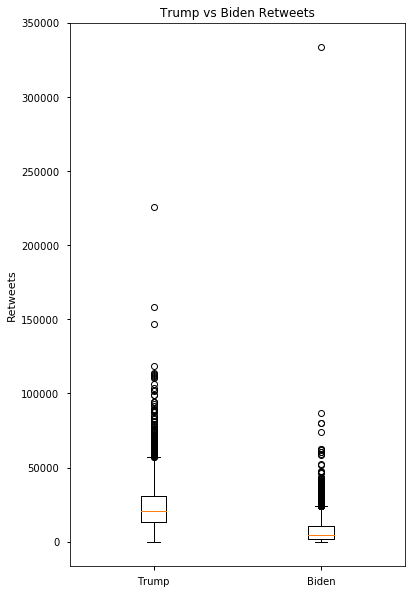

In [25]:
plt.style.use('seaborn-notebook')
plt.figure(figsize=(6, 10))
plt.boxplot([trump_df['retweet_count'], biden_df['retweet_count']], labels=['Trump', 'Biden'], autorange=False)

plt.ylabel('Retweets')
plt.title('Trump vs Biden Retweets')

C:\Users\david\anaconda3\envs\PythonCPU\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Trump vs Biden Favorites')

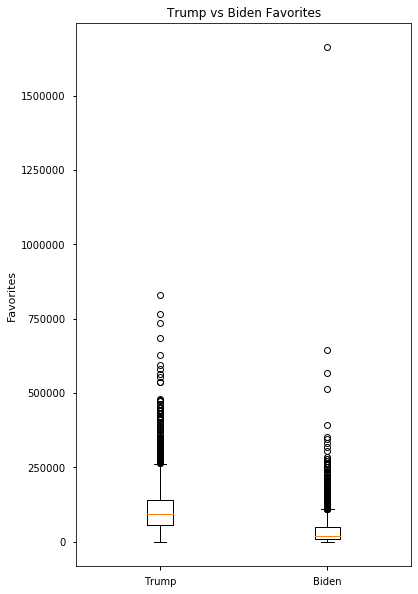

In [26]:
plt.figure(figsize=(6, 10))
plt.boxplot([trump_df['favorite_count'], biden_df['favorite_count']], labels=['Trump', 'Biden'], autorange=False)
plt.ylabel('Favorites')
plt.title('Trump vs Biden Favorites')

The box plots clearly show that on average Biden has less engagement than Trump on Twitter, except for his one outlier tweet that went viral. 

## Which words and n-grams do they use the most?

### Unigrams

In [27]:
trump_tokens = trump_df['tokens'].explode()
biden_tokens = biden_df['tokens'].explode()

trump_unigrams = FreqDist(ngrams(trump_tokens, 1))
biden_unigrams = FreqDist(ngrams(biden_tokens, 1))

[(('great',), 668),
 (('people',), 311),
 (('news',), 292),
 (('thank',), 286),
 (('fake',), 245),
 (('big',), 213),
 (('new',), 193),
 (('president',), 179),
 (('never',), 173),
 (('democrats',), 172),
 (('would',), 171),
 (('many',), 170),
 (('total',), 162),
 (('country',), 155),
 (('get',), 154),
 (('complete',), 152),
 (('job',), 151),
 (('nothing',), 150),
 (('joe',), 146),
 (('endorsement',), 146)]

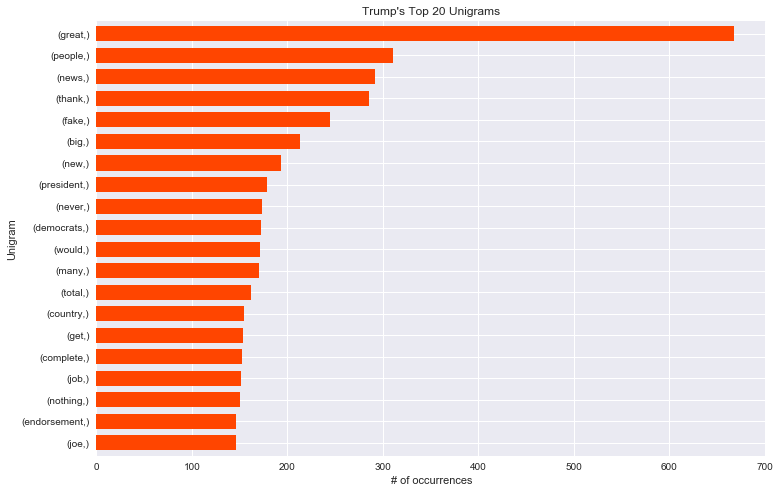

In [28]:
plt.style.use('seaborn')
NUM_NGRAMS = 20

pd.Series(ngrams(trump_tokens, 1)).value_counts()[:NUM_NGRAMS].sort_values().plot.barh(color='orangered', width=.7, figsize=(12,8))
plt.title("Trump's Top 20 Unigrams")
plt.ylabel('Unigram')
plt.xlabel('# of occurrences')
trump_unigrams.most_common(NUM_NGRAMS)

[(('trump',), 463),
 (('donald',), 399),
 (('president',), 390),
 (('need',), 317),
 (('nation',), 213),
 (('one',), 208),
 (('people',), 193),
 (('american',), 192),
 (('every',), 181),
 (('country',), 180),
 (('crisis',), 174),
 (('get',), 173),
 (('together',), 158),
 (('make',), 157),
 (('health',), 151),
 (('day',), 149),
 (('time',), 142),
 (('today',), 139),
 (('care',), 132),
 (('help',), 131)]

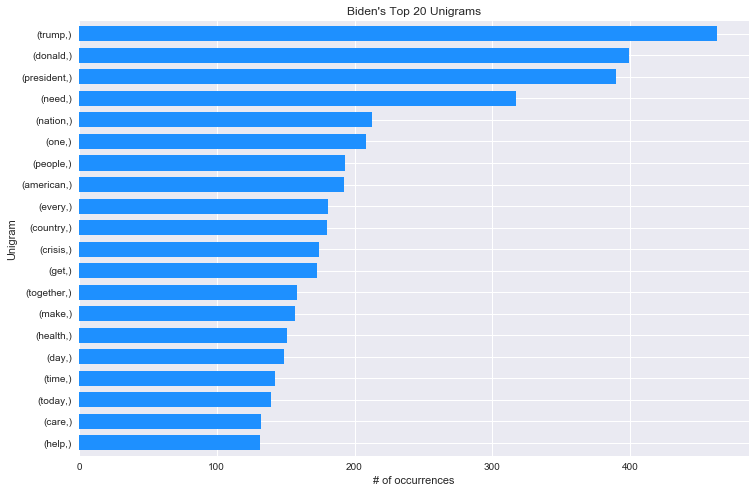

In [29]:
pd.Series(ngrams(biden_tokens, 1)).value_counts()[:NUM_NGRAMS].sort_values().plot.barh(color='dodgerblue', width=.7, figsize=(12,8))
plt.title("Biden's Top 20 Unigrams")
plt.ylabel('Unigram')
plt.xlabel('# of occurrences')
biden_unigrams.most_common(NUM_NGRAMS)

### Bigrams

In [30]:
trump_bigrams = FreqDist(ngrams(trump_tokens, 2))
biden_bigrams = FreqDist(ngrams(biden_tokens, 2))

[(('fake', 'news'), 190),
 (('complete', 'total'), 127),
 (('total', 'endorsement'), 126),
 (('radical', 'left'), 85),
 (('white', 'house'), 76),
 (('second', 'amendment'), 72),
 (('united', 'states'), 68),
 (('military', 'vets'), 67),
 (('sleepy', 'joe'), 65),
 (('great', 'state'), 62),
 (('new', 'york'), 61),
 (('great', 'job'), 59),
 (('joe', 'biden'), 57),
 (('mini', 'mike'), 52),
 (('republican', 'party'), 51),
 (('lamestream', 'media'), 51),
 (('nothing', 'democrats'), 49),
 (('impeachment', 'hoax'), 47),
 (('president', 'trump'), 39),
 (('federal', 'government'), 38)]

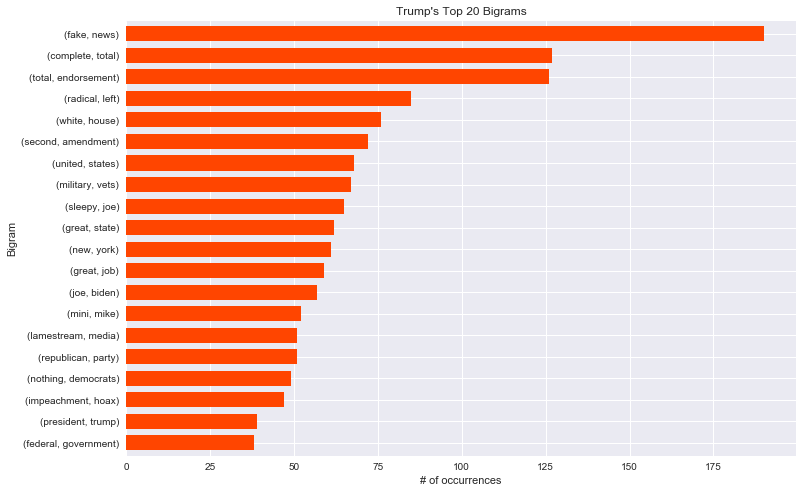

In [31]:
pd.Series(ngrams(trump_tokens, 2)).value_counts()[:NUM_NGRAMS].sort_values().plot.barh(color='orangered', width=.7, figsize=(12,8))
plt.title("Trump's Top 20 Bigrams")
plt.ylabel('Bigram')
plt.xlabel('# of occurrences')
trump_bigrams.most_common(NUM_NGRAMS)

[(('donald', 'trump'), 345),
 (('health', 'care'), 87),
 (('white', 'house'), 80),
 (('american', 'people'), 70),
 (('need', 'president'), 60),
 (('donald', 'trumps'), 53),
 (('president', 'trump'), 50),
 (('soul', 'nation'), 49),
 (('need', 'help'), 47),
 (('every', 'day'), 42),
 (('beat', 'donald'), 42),
 (('across', 'country'), 33),
 (('make', 'sure'), 30),
 (('battle', 'soul'), 30),
 (('climate', 'change'), 30),
 (('front', 'lines'), 30),
 (('south', 'carolina'), 29),
 (('public', 'health'), 27),
 (('four', 'years'), 27),
 (('come', 'together'), 26)]

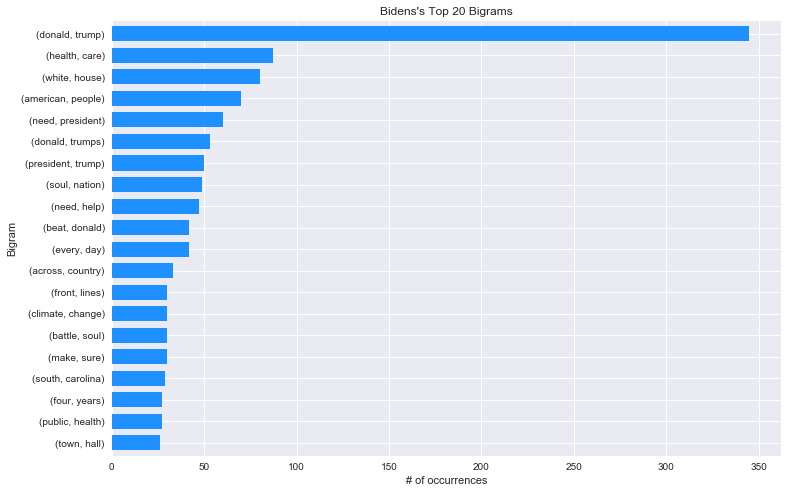

In [32]:
pd.Series(ngrams(biden_tokens, 2)).value_counts()[:NUM_NGRAMS].sort_values().plot.barh(color='dodgerblue', width=.7, figsize=(12,8))
plt.title("Bidens's Top 20 Bigrams")
plt.ylabel('Bigram')
plt.xlabel('# of occurrences')
biden_bigrams.most_common(NUM_NGRAMS)

### Trigrams

In [33]:
trump_trigrams = FreqDist(ngrams(trump_tokens, 3))
biden_trigrams = FreqDist(ngrams(biden_tokens, 3))

[(('complete', 'total', 'endorsement'), 125),
 (('sleepy', 'joe', 'biden'), 29),
 (('fake', 'news', 'media'), 28),
 (('radical', 'left', 'nothing'), 25),
 (('loves', 'military', 'vets'), 25),
 (('approval', 'rating', 'republican'), 24),
 (('rating', 'republican', 'party'), 24),
 (('left', 'nothing', 'democrats'), 24),
 (('fake', 'news', 'cnn'), 24),
 (('mini', 'mike', 'bloomberg'), 20),
 (('supporter', 'maga', 'agenda'), 17),
 (('radical', 'left', 'democrats'), 16),
 (('white', 'house', 'news'), 16),
 (('republican', 'party', 'thank'), 15),
 (('russia', 'russia', 'russia'), 14),
 (('cryin', 'chuck', 'schumer'), 14),
 (('house', 'news', 'conference'), 14),
 (('make', 'america', 'great'), 13),
 (('vets', 'second', 'amendment'), 12),
 (('corrupt', 'joe', 'biden'), 12)]

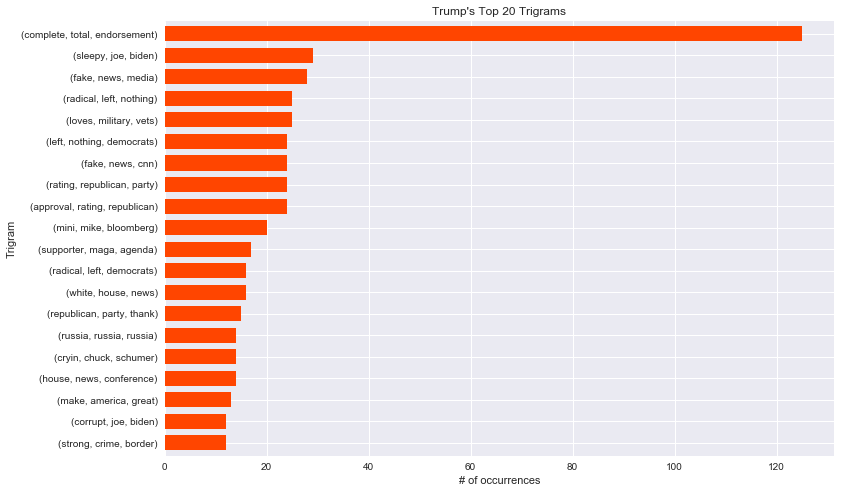

In [34]:
pd.Series(ngrams(trump_tokens, 3)).value_counts()[:NUM_NGRAMS].sort_values().plot.barh(color='orangered', width=.7, figsize=(12,8))
plt.title("Trump's Top 20 Trigrams")
plt.ylabel('Trigram')
plt.xlabel('# of occurrences')
trump_trigrams.most_common(NUM_NGRAMS)

[(('beat', 'donald', 'trump'), 41),
 (('battle', 'soul', 'nation'), 30),
 (('defeat', 'donald', 'trump'), 21),
 (('trump', 'white', 'house'), 20),
 (('keep', 'momentum', 'going'), 20),
 (('health', 'care', 'workers'), 18),
 (('gun', 'violence', 'epidemic'), 17),
 (('donald', 'trump', 'white'), 16),
 (('end', 'gun', 'violence'), 16),
 (('tune', 'watch', 'live'), 16),
 (('make', 'voice', 'heard'), 15),
 (('front', 'lines', 'crisis'), 14),
 (('restore', 'soul', 'nation'), 14),
 (('every', 'single', 'day'), 13),
 (('four', 'years', 'donald'), 13),
 (('front', 'lines', 'fight'), 13),
 (('get', 'donald', 'trump'), 13),
 (('get', 'white', 'house'), 13),
 (('public', 'health', 'crisis'), 12),
 (('american', 'people', 'deserve'), 12)]

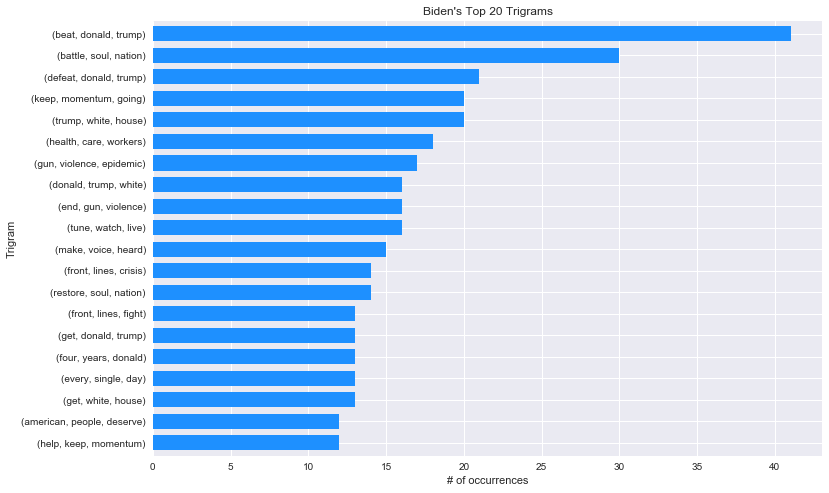

In [35]:
pd.Series(ngrams(biden_tokens, 3)).value_counts()[:NUM_NGRAMS].sort_values().plot.barh(color='dodgerblue', width=.7, figsize=(12,8))
plt.title("Biden's Top 20 Trigrams")
plt.ylabel('Trigram')
plt.xlabel('# of occurrences')
biden_trigrams.most_common(NUM_NGRAMS)

### 4-5 grams

[(('approval', 'rating', 'republican', 'party'), 24),
 (('radical', 'left', 'nothing', 'democrats'), 22),
 (('rating', 'republican', 'party', 'thank'), 14),
 (('white', 'house', 'news', 'conference'), 14),
 (('approval', 'rating', 'republican', 'party', 'thank'), 14),
 (('complete', 'total', 'endorsement', 'congressman'), 11),
 (('military', 'vets', 'second', 'amendment'), 10),
 (('white', 'house', 'press', 'conference'), 10),
 (('complete', 'total', 'endorsement', 'vote'), 10),
 (('loves', 'military', 'vets', 'strong'), 8),
 (('supporter', 'maga', 'agenda', 'strong'), 7),
 (('fake', 'news', 'lamestream', 'media'), 7),
 (('mike', 'complete', 'total', 'endorsement'), 7),
 (('house', 'press', 'conference', 'today'), 7),
 (('white', 'house', 'press', 'conference', 'today'), 7),
 (('fake', 'news', 'cnn', 'msdnc'), 6),
 (('failing', 'new', 'york', 'times'), 6),
 (('crime', 'border', 'second', 'amendment'), 6),
 (('totally', 'partisan', 'impeachment', 'hoax'), 6),
 (('strong', 'crime', 'mili

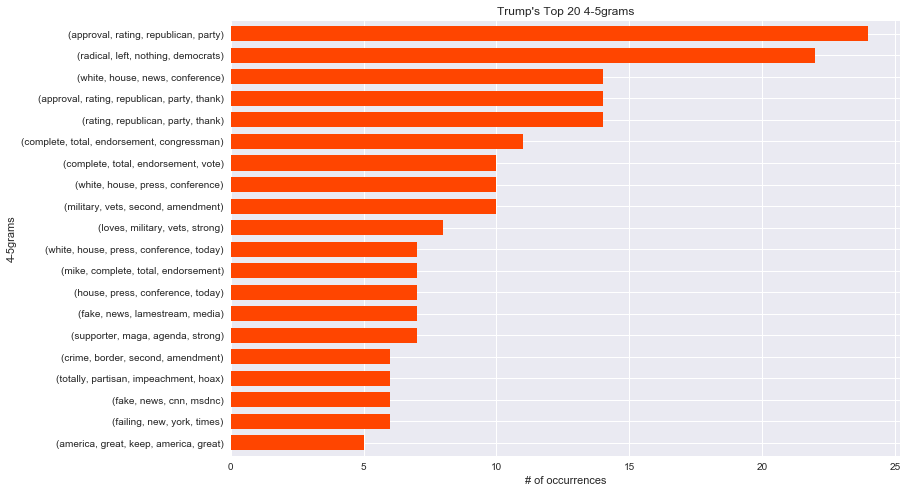

In [36]:
pd.Series(everygrams(trump_tokens, min_len= 4, max_len=5)).value_counts()[:NUM_NGRAMS].sort_values().plot.barh(color='orangered', width=.7, figsize=(12,8))
plt.title("Trump's Top 20 4-5grams")
plt.ylabel('4-5grams')
plt.xlabel('# of occurrences')

trump_4_5_grams = FreqDist(everygrams(trump_tokens, min_len= 4, max_len=5))
trump_4_5_grams.most_common(NUM_NGRAMS)

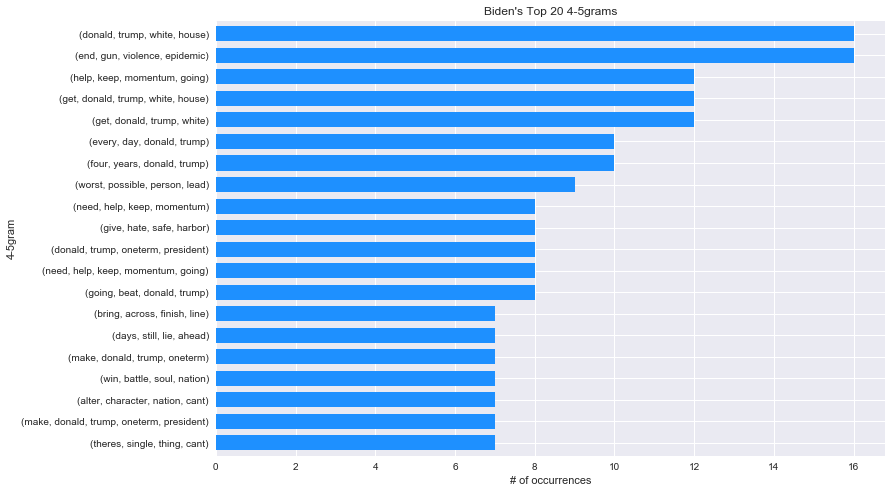

In [37]:
pd.Series(everygrams(biden_tokens, min_len= 4, max_len=5)).value_counts()[:NUM_NGRAMS].sort_values().plot.barh(color='dodgerblue', width=.7, figsize=(12,8))
plt.title("Biden's Top 20 4-5grams")
plt.ylabel('4-5gram')
plt.xlabel('# of occurrences')

biden_4_5_grams = FreqDist(everygrams(biden_tokens, min_len= 4, max_len=5)).most_common(NUM_NGRAMS)

From the above n-grams, it seems that Biden talks a lot about gun violence, healthcare, and climate change, while Trump talks a lot about fake news, whitehouse conferences, endorsements and republican party ratings. They also both mention each other a lot. Question is, how much? 

## How many times do they mention each other?

In [114]:
trump_tweets_contain_biden = trump_df[trump_df['text'].str.lower().str.contains("joe|biden")]
print(len(trump_tweets_contain_biden), "Trump tweets mention Joe Biden.")
trump_mention_biden_percent = round(100 * len(trump_tweets_contain_biden)/ len(trump_df), 2)
print("That means", trump_mention_biden_percent,  "% of Trump tweets mention Joe Biden")

177 Trump tweets mention Joe Biden.
That means 6.65 % of Trump tweets mention Joe Biden


In [115]:
biden_tweets_contain_trump = biden_df[biden_df['text'].str.lower().str.contains("trump|donald")]
print(len(biden_tweets_contain_trump), "Biden tweets mention Donald Trump.")
biden_mention_trump_percent = round(100 * len(biden_tweets_contain_trump)/ len(biden_df), 2)
print("That means", biden_mention_trump_percent,  "% of Biden tweets mention Donald Trump")

517 Biden tweets mention Donald Trump.
That means 30.87 % of Biden tweets mention Donald Trump


## How many times do they mention the coronavirus? 

In [40]:
corona_regex = "covid|corona|virus|pandemic"
biden_tweets_relate_corona = biden_df[biden_df['text'].str.lower().str.contains(corona_regex)]
print(len(biden_tweets_relate_corona))
biden_tweets_relate_corona_percent = round(100 * len(biden_tweets_relate_corona)/ len(biden_df), 2)
print("That means", biden_tweets_relate_corona_percent,  "% of Biden tweets mention coronavirus")

219
That means 13.07 % of Biden tweets mention coronavirus


In [41]:
trump_tweets_relate_corona = trump_df[trump_df['text'].str.lower().str.contains(corona_regex)]
print(len(trump_tweets_relate_corona))
trump_tweets_relate_corona_percent = round(100 * len(trump_tweets_relate_corona)/ len(trump_df), 2)
print("That means", trump_tweets_relate_corona_percent,  "% of Trump tweets mention coronavirus")

174
That means 6.54 % of Trump tweets mention coronavirus


Biden tweets about the coronavirus nearly twice as much as Trump. Also while only ~7% of Trump tweets mention Joe Biden, nearly 31% of Biden tweets mention Trump.

# How frequently do they tweet? Has the frequency of tweets changed as the pandemic evolved?

### Trump

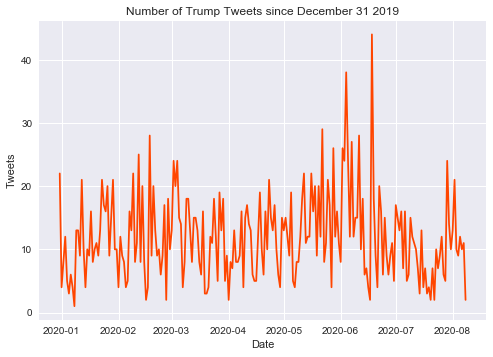

In [42]:
trump_tweet_by_date = trump_df.groupby(by=trump_df['created_at'].dt.date).count()['text']
plt.plot(trump_tweet_by_date.index.values, trump_tweet_by_date, color='orangered')
plt.xlabel('Date')
plt.ylabel('Tweets')
plt.title('Number of Trump Tweets since December 31 2019')
plt.show()

### Biden

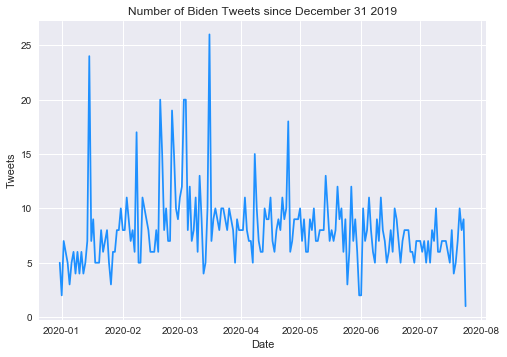

In [43]:
biden_tweet_by_date = biden_df.groupby(by=biden_df['created_at'].dt.date).count()['text']
plt.plot(biden_tweet_by_date.index.values, biden_tweet_by_date, color='dodgerblue')
plt.xlabel('Date')
plt.ylabel('Tweets')
plt.title('Number of Biden Tweets since December 31 2019')
plt.show()

### Both candidates on the same figure

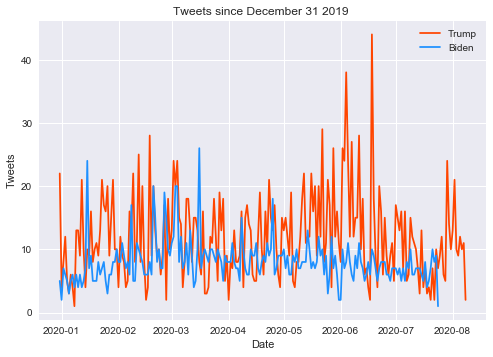

In [44]:
plt.plot(trump_tweet_by_date.index.values, trump_tweet_by_date, 'orangered')
plt.plot(biden_tweet_by_date.index.values, biden_tweet_by_date, 'dodgerblue')
plt.xlabel('Date')
plt.ylabel('Tweets')
plt.title('Tweets since December 31 2019 ')
plt.legend(['Trump', 'Biden'])
plt.show()

From the graphs above, it seems that there are peaks and valleys. Future work would be to investigate the dates with more tweets than normal to see if those are linked with news events. Moreover, the variance in the number of tweets brings up the question if they tweet more on certain days over others?

## Do they prefer to tweet on certain days over others?

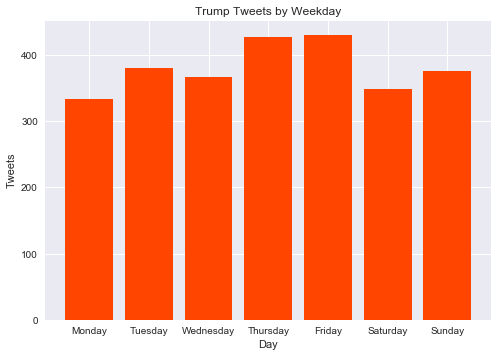

In [45]:
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

trump_tweets_by_weekday = trump_df.groupby(by=trump_df['created_at'].dt.day_name()).count().reindex(weekdays)['text']
plt.bar(trump_tweets_by_weekday.index.values, trump_tweets_by_weekday, color='orangered')
plt.xlabel('Day')
plt.ylabel('Tweets')
plt.title('Trump Tweets by Weekday')
plt.show()

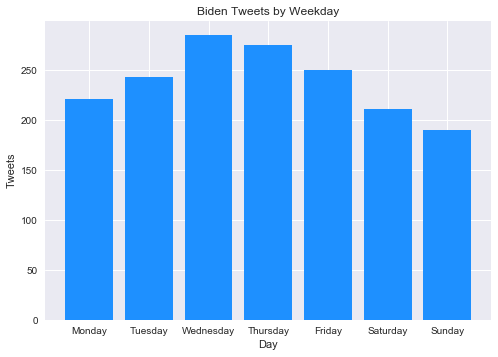

In [46]:
biden_tweets_by_weekday = biden_df.groupby(by=biden_df['created_at'].dt.day_name()).count().reindex(weekdays)['text']
plt.bar(biden_tweets_by_weekday.index.values, biden_tweets_by_weekday, color='dodgerblue')
plt.xlabel('Day')
plt.ylabel('Tweets')
plt.title('Biden Tweets by Weekday')
plt.show()

It seems that Biden tends to tweet most during the middle of the week and tapers off on the weekend. Whereas Trump tends to tweet consistently with a tendency to tweet more on Thursdays and Fridays.

# 5. Sentiment Analysis<a class="anchor" id="sentiment_analysis">

## Get polarity and subjectivity scores for candidate tweets

In [47]:
# Measure subjectivity of a text. Subjectivity is in the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Use polarity as a measure for sentiment. Polarity is in the range [-1.0, 1.0] where -1 is negative and +1 is positive sentiment
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [48]:
trump_df['Subjectivity'] = trump_df['clean_text'].apply(get_subjectivity)
trump_df['Polarity'] = trump_df['clean_text'].apply(get_polarity)

biden_df['Subjectivity'] = biden_df['clean_text'].apply(get_subjectivity)
biden_df['Polarity'] = biden_df['clean_text'].apply(get_polarity)

In [49]:
print(trump_df['Polarity'])
print(trump_df['Subjectivity'])

12      0.031250
13      0.000000
21      0.253333
22      0.269924
23      0.154762
          ...   
7028    0.087714
7029    0.588889
7030    0.164444
7031    0.186667
7032    0.008333
Name: Polarity, Length: 2660, dtype: float64
12      0.250000
13      0.050000
21      0.423333
22      0.441970
23      0.253968
          ...   
7028    0.219429
7029    0.729167
7030    0.380000
7031    0.356667
7032    0.425000
Name: Subjectivity, Length: 2660, dtype: float64


## Assign positive, neutral, and negative labels to tweets based on polarity

In [50]:
def get_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [51]:
trump_df['Sentiment'] = trump_df['Polarity'].apply(get_sentiment)
biden_df['Sentiment'] = biden_df['Polarity'].apply(get_sentiment)

In [52]:
trump_df['Sentiment']

12      Positive
13       Neutral
21      Positive
22      Positive
23      Positive
          ...   
7028    Positive
7029    Positive
7030    Positive
7031    Positive
7032    Positive
Name: Sentiment, Length: 2660, dtype: object

## Most Positive and Negative Tweets

### Trump

In [121]:
trump_most_positive = trump_df.nlargest(10, 'Polarity')
print("Trump's top", len(trump_most_negative), "most positive tweets" )

for idx, tweet in enumerate(trump_most_positive['text']):
    print(idx, tweet)
    print()

Trump's top 10 most positive tweets
0 Two wonderful people! https://t.co/Fo2CLjc9YZ

1 I built the greatest economy in the World the best the U.S. has ever had. I am doing it again!

2 ...AND THE BEST IS YET TO COME!

3 The Democrat’s Best &amp; Finest! https://t.co/xAmbP1Nnm0

4 ....We have the greatest healthcare system experts scientists and doctors anywhere in the world. Together we will PREVAIL!

5 THE BEST IS YET TO COME! https://t.co/C0RicMRP0Z

6 “An investigation into NOTHING.” The wonderful @trish_regan on the Mueller Witch Hunt!

7 ....for the wonderful job he has done and we look forward to working with him closely perhaps in another capacity within the Administration!

8 Congratulations to Eddie DeBartolo Jr. and your wonderful family of friends! https://t.co/IJu93xjiQS

9 BEST USA ECONOMY IN HISTORY!



In [119]:
trump_most_negative = trump_df.nsmallest(10, 'Polarity')
print("Trump's top", len(trump_most_negative), "most negative tweets" )

for idx, tweet in enumerate(trump_most_negative['text']):
    print(idx, tweet)
    print()

Trump's top 10 most negative tweets
0 This is outrageous. Must be met with immediate litigation! @GOPChairwoman https://t.co/CD6bD3Kn6J

1 ....are getting caught doing very evil things and Republicans should take note. This was grave misconduct by the Obama Justice Department! @GovChristie

2 “Sotomayor accuses GOP appointed Justices  of being biased in favor of Trump.” @IngrahamAngle @FoxNews  This is a terrible thing to say. Trying to “shame” some into voting her way? She never criticized Justice Ginsberg when she called me a “faker”. Both should recuse themselves..

3 Don Lemon the dumbest man on television (with terrible ratings!). https://t.co/iQXCc7lvCt

4 A very bad night for Mini Mike!

5 ....The reason for this is that the Do Nothing Democrats using disinformation Hoax number 7 don’t want Bernie Sanders to get the Democrat Nomination and they figure this would be very bad for his chances. It’s all rigged again against Crazy Bernie Sanders!

6 Another Fake Whistleblower. Republ

### Biden

In [122]:
biden_most_positive = biden_df.nlargest(10, 'Polarity')
print("Biden's top", len(biden_most_positive), "most positive tweets" )

for idx, tweet in enumerate(biden_most_positive['text']):
    print(idx, tweet)
    print()

Biden's top 10 most positive tweets
0 The health care workers on the frontlines of this fight are some of the greatest heroes our nation has ever seen. https://t.co/Ry6TvJcbuU

1 It’s in some of our darkest moments of despair that we’ve made some of our greatest progress. If we stand together, as one America, we'll rise stronger than before. https://t.co/buzkmkM1Gf

2 It’s in some of our darkest moments of despair that we’ve made some of our greatest progress — and we have that chance once again. We’re not just going to rebuild this nation — we’re going to transform it. 

There is nothing we can’t do if we do it together. https://t.co/iozMdaLtAw

3 Make no mistake: I believe our best days still lie ahead. We can and will transform this nation — together.

4 As Muslim families across America and around the world celebrate the beginning of Ramadan, @DrBiden and I want to extend our best wishes to all who are observing this holy month. Ramadan Mubarak. https://t.co/mhKD5YSN85

5 This is a

In [123]:
biden_most_negative = biden_df.nsmallest(10, 'Polarity')
print("Biden's top", len(biden_most_negative), "most negative tweets" )

for idx, tweet in enumerate(biden_most_negative['text']):
    print(idx, tweet)
    print()

Biden's top 10 most negative tweets
0 Families across the country are impacted by COVID-19—and it can be especially difficult to explain to children. 

Jill and I spoke with ItsJudysLife, JHouseVlogs and The Curly Coopers to answer their questions about the crisis. Tune in on Sunday at 7PM ET: https://t.co/xk0GcS7PGq https://t.co/TUQnhOroTU

1 34 U.S. troops have been diagnosed with traumatic brain injury after Iranian missiles struck their base in Iraq. Donald Trump brought us to the brink of war—then dismissed the injuries as “headaches.”

The idea that the commander in chief would take this lightly is disgusting. https://t.co/Cn8Bb7KLy4

2 We’re building a campaign powered by the backbone and the base of the Democratic party. A campaign that will defeat Donald Trump and restore the soul of this nation. Join us: https://t.co/gnaFCACYrW

3 Donald Trump's "Remain in Mexico" policy is dangerous, inhumane, and goes against everything we stand for as a nation of immigrants. My administrat

## Visualize Sentiment Analysis

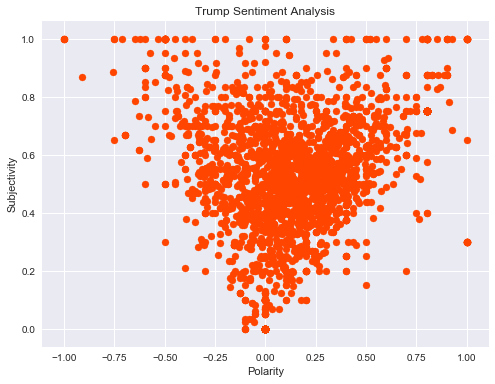

In [57]:
plt.figure(figsize=(8,6)) 
plt.scatter(trump_df["Polarity"], trump_df["Subjectivity"], color='orangered')            
plt.title('Trump Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

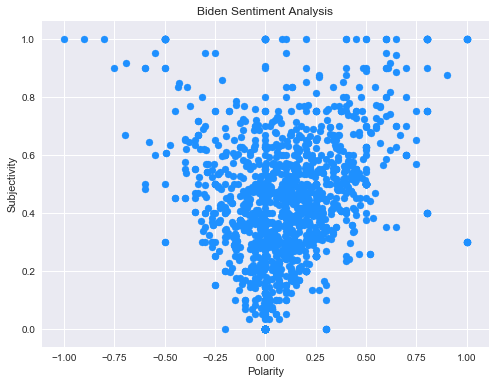

In [58]:
plt.figure(figsize=(8,6)) 
plt.scatter(biden_df["Polarity"], biden_df["Subjectivity"], color='dodgerblue') 

plt.title('Biden Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

### View the counts of positive, netural, and negative tweets

In [59]:
trump_df['Sentiment'].value_counts()

Positive    1583
Negative     659
Neutral      418
Name: Sentiment, dtype: int64

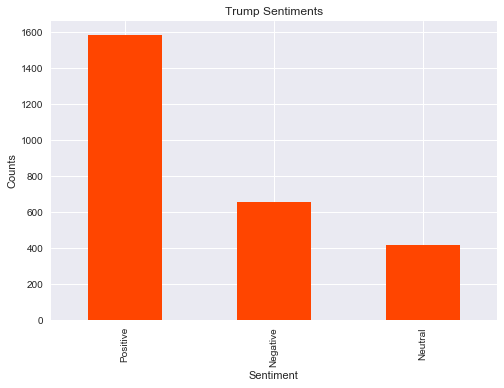

In [60]:
plt.title('Trump Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
trump_df['Sentiment'].value_counts().plot(kind = 'bar', color='orangered')
plt.show()

In [61]:
biden_df['Sentiment'].value_counts()

Positive    906
Neutral     396
Negative    373
Name: Sentiment, dtype: int64

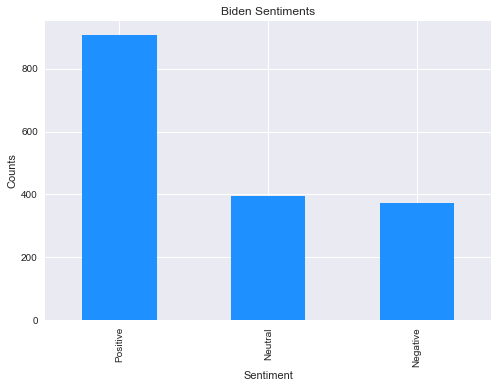

In [62]:
plt.title('Biden Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
biden_df['Sentiment'].value_counts().plot(kind = 'bar', color='dodgerblue')
plt.show()

## Percentage of positive/negative tweets of each candidate

### Trump

In [63]:
positive_trump_tweets = trump_df[trump_df.Sentiment == 'Positive']
positive_trump_percent = round(len(positive_trump_tweets) / len(trump_df) * 100, 2)
print(positive_trump_percent, '% of trump tweets are positive.')

59.51 % of trump tweets are positive.


In [64]:
# Get % of trump tweets that are neutral
neutral_trump_tweets = trump_df[trump_df.Sentiment == 'Neutral']
neutral_trump_percent = round(len(neutral_trump_tweets) / len(trump_df) * 100, 2)
print(neutral_trump_percent,'% of trump tweets are neutral.')

15.71 % of trump tweets are neutral.


In [65]:
negative_trump_tweets = trump_df[trump_df.Sentiment == 'Negative']
negative_trump_percent = round(len(negative_trump_tweets) / len(trump_df) * 100, 2)
print(negative_trump_percent, '% of trump tweets are negative.')

24.77 % of trump tweets are negative.


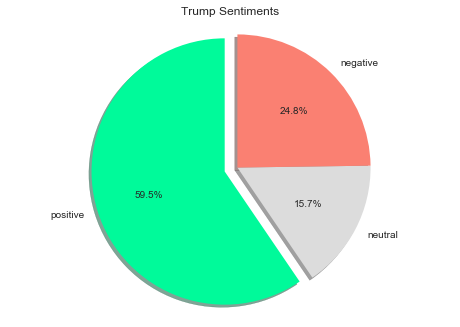

In [66]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
sentiments = ['positive', 'neutral', 'negative']
percentages = [positive_trump_percent, neutral_trump_percent, negative_trump_percent]
explode = [0.1, 0, 0]

fig1, ax1 = plt.subplots()
pie_colors = ['mediumspringgreen', 'gainsboro', 'salmon']
ax1.pie(percentages, explode=explode, labels=sentiments, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=pie_colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Trump Sentiments")
plt.show()

### Biden

In [67]:
positive_biden_tweets = biden_df[biden_df.Sentiment == 'Positive']
positive_biden_percent = round(len(positive_biden_tweets) / len(biden_df) * 100, 2)
print(positive_biden_percent, '% of biden tweets are positive.')

54.09 % of biden tweets are positive.


In [68]:
neutral_biden_tweets = biden_df[biden_df.Sentiment == 'Neutral']
neutral_biden_percent = round(len(neutral_biden_tweets) / len(biden_df) * 100, 2)
print(neutral_biden_percent, '% of biden tweets are neutral.')

23.64 % of biden tweets are neutral.


In [69]:
negative_biden_tweets = biden_df[biden_df.Sentiment == 'Negative']
negative_biden_percent = round(len(negative_biden_tweets) / len(biden_df) * 100, 2)
print(negative_biden_percent, '% of biden tweets are negative.')

22.27 % of biden tweets are negative.


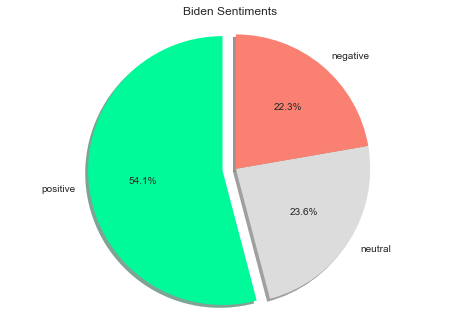

In [70]:
percentages = [positive_biden_percent, neutral_biden_percent, negative_biden_percent]

fig2, ax2 = plt.subplots()
ax2.pie(percentages, explode=explode, labels=sentiments, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=pie_colors)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("Biden Sentiments")
plt.show()

As expected, Trump has a larger proportion of tweets that are perceived as positive (~60% positive compared to Biden's 54% positive). I suspect this is due to Trump's tendency to exaggerate with frequent use of words such as 'great', 'wonderful', etc. Additionally, a slightly larger portion of tweets are negative in comparison to Biden's.

## Did their sentiments change as the pandemic evolved?

### Trump

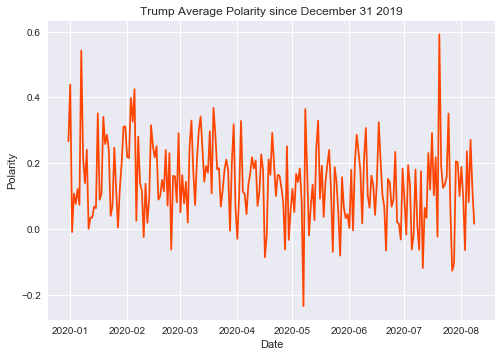

In [71]:
trump_polarity_by_date = trump_df.groupby(by=trump_df['created_at'].dt.date).mean()['Polarity']
plt.plot(trump_polarity_by_date.index.values, trump_polarity_by_date, color='orangered')
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.title('Trump Average Polarity since December 31 2019')
plt.show()

### Biden

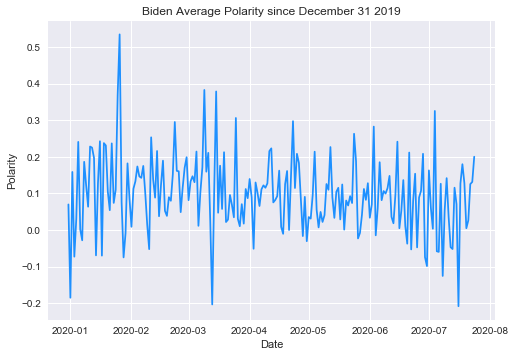

In [72]:
biden_polarity_by_date = biden_df.groupby(by=biden_df['created_at'].dt.date).mean()['Polarity']
plt.plot(biden_polarity_by_date.index.values, biden_polarity_by_date, color='dodgerblue')
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.title('Biden Average Polarity since December 31 2019')
plt.show()

### Both on one plot

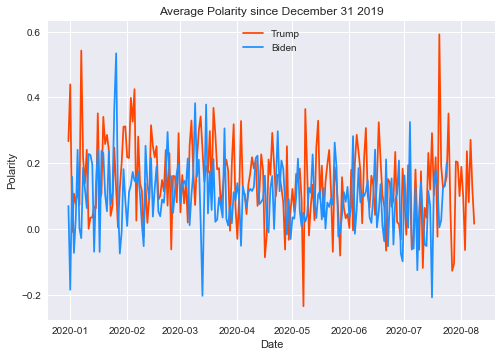

In [73]:
plt.plot(trump_polarity_by_date.index.values, trump_polarity_by_date, color='orangered')
plt.plot(biden_polarity_by_date.index.values, biden_polarity_by_date, color='dodgerblue')
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.title('Average Polarity since December 31 2019')
plt.legend(['Trump', 'Biden'])
plt.show()

There doesn't seem to be any clear trend from the data. Future work could include investigating the dates and tweets with the largest peaks/valleys to see if those correlate with any coronavirus news events.

# 6. Topic Modeling with [LDA](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation)<a class="anchor" id="topic_modeling">

# Peprocess data for topic modelling
Remove words with fewer than three characters, perform lemmatization and stemming, include custom stopwords for each candidate to improve topic modelling. 

In [74]:
# Define functions for topic model preprocessing
custom_trump_stopwords = ['realdonaldtrump', 'great', 'pass']
def stem_and_lemmatize(text):
    return PorterStemmer().stem(WordNetLemmatizer().lemmatize(text))


def lda_processing(tokens):
    result = []
    for token in tokens:
        if token not in custom_trump_stopwords:
#         if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in custom_trump_stopwords:
            result.append(stem_and_lemmatize(token))
    return result

In [75]:
trump_df['processed_tokens'] = trump_df['tokens'].apply(lda_processing)
biden_df['processed_tokens'] = biden_df['tokens'].apply(lda_processing)

Before preprocessing:

In [76]:
trump_df['tokens'].head(20)

12              [major, news, conference, ten, minutes]
13    [sleepy, joe, biden, agreed, radical, left, de...
21    [big, wins, tennessee, kansas, congratulations...
22    [news, conference, chinavirus, announced, good...
23    [3pm, afternoon, spoke, president, aoun, leban...
24    [conference, call, sunday, president, macron, ...
25    [lengthy, discussion, morning, president, macr...
26    [pelosi, schumer, interested, bailout, money, ...
29                               [great, jobs, numbers]
30    [yesterdays, statement, sleepy, joe, biden, lo...
32    [biggest, political, crime, scandal, american,...
43    [sleepy, joe, biden, lost, black, vote, statem...
44    [called, politicization, china, virus, radical...
46    [win, ohio, even, bigger, 2016, maga, stronger...
58    [like, radical, left, new, york, trying, destr...
61    [joe, biden, unlike, african, american, commun...
62                       [departed, great, state, ohio]
64    [upon, departing, oval, office, ohio, ive,

After preprocessing:

In [77]:
trump_df['processed_tokens'].head(20)

12                    [major, news, confer, ten, minut]
13    [sleepi, joe, biden, agre, radic, left, democr...
21    [big, win, tennesse, kansa, congratul, billhag...
22    [news, confer, chinaviru, announc, good, econo...
23    [3pm, afternoon, spoke, presid, aoun, lebanon,...
24    [confer, call, sunday, presid, macron, leader,...
25    [lengthi, discuss, morn, presid, macron, franc...
26    [pelosi, schumer, interest, bailout, money, po...
29                                        [job, number]
30    [yesterday, statement, sleepi, joe, biden, lon...
32    [biggest, polit, crime, scandal, american, his...
43    [sleepi, joe, biden, lost, black, vote, statem...
44    [call, politic, china, viru, radic, left, demo...
46    [win, ohio, even, bigger, 2016, maga, stronger...
58    [like, radic, left, new, york, tri, destroy, n...
61    [joe, biden, unlik, african, american, commun,...
62                                [depart, state, ohio]
64    [upon, depart, oval, offic, ohio, ive, not

In [78]:
trump_processed_tokens = trump_df['processed_tokens']
biden_processed_tokens = biden_df['processed_tokens']

## Create bags of words on the datasets

In [79]:
trump_dictionary = gensim.corpora.Dictionary(trump_processed_tokens)
biden_dictionary = gensim.corpora.Dictionary(biden_processed_tokens)

In [80]:
print("Number of words in Trump dictionary:", len(trump_dictionary))
print("Number of words in Biden dictionary:", len(biden_dictionary))

Number of words in Trump dictionary: 5259
Number of words in Biden dictionary: 3360


In [81]:
# Filter out tokens that appear in less than 10 tweets or more than half the tweets
trump_dictionary.filter_extremes(no_below=10, no_above=0.5)
biden_dictionary.filter_extremes(no_below=10, no_above=0.5)

In [82]:
print("Number of words in Trump dictionary after filtering extremes:", len(trump_dictionary))
print("Number of words in Biden dictionary after filtering extremes:", len(biden_dictionary))

Number of words in Trump dictionary after filtering extremes: 832
Number of words in Biden dictionary after filtering extremes: 586


In [83]:
trump_bow_corpus = [trump_dictionary.doc2bow(tweet) for tweet in trump_processed_tokens]
biden_bow_corpus = [biden_dictionary.doc2bow(tweet) for tweet in biden_processed_tokens]

## Improve bag of words with TF-IDF
We can perform topic modelling directly with our bag of words, but we can further improve it first by incorporating [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). 

In [84]:
trump_tfidf = models.TfidfModel(trump_bow_corpus)
biden_tfidf = models.TfidfModel(biden_bow_corpus)

trump_tfidf_corpus = trump_tfidf[trump_bow_corpus]
biden_tfidf_corpus = biden_tfidf[biden_bow_corpus]

## Train the LDA models with different number of clusters

In [85]:
NUM_WORKERS = 3
NUM_PASSES = 15
trump_lda_3 = gensim.models.LdaMulticore(trump_tfidf_corpus, num_topics=3, id2word=trump_dictionary, passes=NUM_PASSES, workers=NUM_WORKERS)
trump_lda_3.save('trump_lda/trump_lda_3.gensim')

In [86]:
trump_lda_5 = gensim.models.LdaMulticore(trump_tfidf_corpus, num_topics=5, id2word=trump_dictionary, passes=NUM_PASSES, workers=NUM_WORKERS)
trump_lda_5.save('trump_lda/trump_lda_5.gensim')

In [87]:
trump_lda_7 = gensim.models.LdaMulticore(trump_tfidf_corpus, num_topics=7, id2word=trump_dictionary, passes=NUM_PASSES, workers=NUM_WORKERS)
trump_lda_7.save('trump_lda/trump_lda_7.gensim')

In [88]:
trump_lda_10 = gensim.models.LdaMulticore(trump_tfidf_corpus, num_topics=10, id2word=trump_dictionary, passes=NUM_PASSES, workers=NUM_WORKERS)
trump_lda_10.save('trump_lda/trump_lda_10.gensim')

In [89]:
biden_lda_3 = gensim.models.LdaMulticore(biden_tfidf_corpus, num_topics=3, id2word=biden_dictionary, passes=NUM_PASSES, workers=NUM_WORKERS)
biden_lda_3.save('biden_lda/biden_lda_3.gensim')

In [90]:
biden_lda_5 = gensim.models.LdaMulticore(biden_tfidf_corpus, num_topics=5, id2word=biden_dictionary, passes=NUM_PASSES, workers=NUM_WORKERS)
biden_lda_5.save('biden_lda/biden_lda_5.gensim')

In [91]:
biden_lda_7 = gensim.models.LdaMulticore(biden_tfidf_corpus, num_topics=7, id2word=biden_dictionary, passes=NUM_PASSES, workers=NUM_WORKERS)
biden_lda_7.save('biden_lda/biden_lda_7.gensim')

In [92]:
biden_lda_10 = gensim.models.LdaMulticore(biden_tfidf_corpus, num_topics=10, id2word=biden_dictionary, passes=NUM_PASSES, workers=NUM_WORKERS)
biden_lda_10.save('biden_lda/biden_lda_10.gensim')

## Look at words in each topic with their relative weights

### Trump

In [93]:
for idx, topic in trump_lda_5.print_topics(num_words=7):
    print("Topic %d:" %idx, topic)

Topic 0: 0.015*"endors" + 0.015*"complet" + 0.013*"total" + 0.011*"maga" + 0.011*"mike" + 0.010*"support" + 0.010*"love"
Topic 1: 0.008*"job" + 0.008*"big" + 0.007*"medium" + 0.007*"year" + 0.007*"presid" + 0.007*"america" + 0.007*"done"
Topic 2: 0.010*"test" + 0.009*"feder" + 0.009*"countri" + 0.009*"governor" + 0.008*"coronaviru" + 0.008*"open" + 0.008*"must"
Topic 3: 0.035*"thank" + 0.012*"news" + 0.010*"confer" + 0.009*"white" + 0.009*"hous" + 0.009*"parti" + 0.009*"republican"
Topic 4: 0.012*"fake" + 0.010*"news" + 0.009*"john" + 0.008*"democrat" + 0.008*"russia" + 0.007*"know" + 0.007*"thank"


### Biden

In [94]:
for idx, topic in biden_lda_5.print_topics(num_words=7):
    print("Topic %d:" %idx, topic)

Topic 0: 0.016*"presid" + 0.013*"one" + 0.013*"peopl" + 0.012*"american" + 0.011*"need" + 0.011*"respons" + 0.011*"crisi"
Topic 1: 0.019*"thank" + 0.012*"join" + 0.010*"choos" + 0.010*"tune" + 0.010*"covid19" + 0.010*"stronger" + 0.009*"hope"
Topic 2: 0.010*"gun" + 0.009*"presid" + 0.009*"pay" + 0.008*"life" + 0.008*"price" + 0.008*"american" + 0.008*"like"
Topic 3: 0.012*"help" + 0.010*"make" + 0.010*"campaign" + 0.010*"trump" + 0.010*"go" + 0.009*"donald" + 0.009*"chip"
Topic 4: 0.022*"care" + 0.017*"health" + 0.014*"year" + 0.012*"protect" + 0.012*"test" + 0.010*"need" + 0.010*"trump"


## Test models on a new unseen tweet

### Trump

In [95]:
unseen_trump_tweet = 'Big China Virus breakouts all over the World, including nations which were thought to have done a great job. The Fake News doesn’t report this. USA will be stronger than ever before, and soon!'
trump_bow_vector = trump_dictionary.doc2bow(lda_processing(basic_processing(unseen_trump_tweet)))

for index, score in sorted(trump_lda_5[trump_bow_vector], key=lambda t: t[1], reverse=True):
    print("Score: {}\t Topic: {}".format(score, trump_lda_5.print_topic(index, topn=5)))

Score: 0.9540975093841553	 Topic: 0.008*"job" + 0.008*"big" + 0.007*"medium" + 0.007*"year" + 0.007*"presid"
Score: 0.011612450703978539	 Topic: 0.015*"endors" + 0.015*"complet" + 0.013*"total" + 0.011*"maga" + 0.011*"mike"
Score: 0.011515050195157528	 Topic: 0.010*"test" + 0.009*"feder" + 0.009*"countri" + 0.009*"governor" + 0.008*"coronaviru"
Score: 0.011474236845970154	 Topic: 0.035*"thank" + 0.012*"news" + 0.010*"confer" + 0.009*"white" + 0.009*"hous"
Score: 0.011300738900899887	 Topic: 0.012*"fake" + 0.010*"news" + 0.009*"john" + 0.008*"democrat" + 0.008*"russia"


### Biden

In [96]:
unseen_biden_tweet = 'Our planet can’t take four more years of Donald Trump. We have to get him out of the White House so we can start treating the climate crisis like the urgent threat it is.'
biden_bow_vector = biden_dictionary.doc2bow(lda_processing(basic_processing(unseen_biden_tweet)))

for index, score in sorted(biden_lda_5[biden_bow_vector], key=lambda t: t[1], reverse=True):
    print("Score: {}\t Topic: {}".format(score, biden_lda_5.print_topic(index, topn=5)))

Score: 0.5502035021781921	 Topic: 0.012*"help" + 0.010*"make" + 0.010*"campaign" + 0.010*"trump" + 0.010*"go"
Score: 0.4140247702598572	 Topic: 0.022*"care" + 0.017*"health" + 0.014*"year" + 0.012*"protect" + 0.012*"test"
Score: 0.01197007205337286	 Topic: 0.016*"presid" + 0.013*"one" + 0.013*"peopl" + 0.012*"american" + 0.011*"need"
Score: 0.011931134387850761	 Topic: 0.010*"gun" + 0.009*"presid" + 0.009*"pay" + 0.008*"life" + 0.008*"price"
Score: 0.01187051273882389	 Topic: 0.019*"thank" + 0.012*"join" + 0.010*"choos" + 0.010*"tune" + 0.010*"covid19"


## Visualize topics

### 3 topics

#### Trump

In [97]:
pyLDAvis.enable_notebook()

trump_lda3_display = pyLDAvis.gensim.prepare(topic_model=trump_lda_3, corpus=trump_tfidf_corpus, dictionary=trump_dictionary)
trump_lda3_display

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.128784  0.053991       1        1  42.816830
1     -0.011274 -0.125171       2        1  30.225033
2     -0.117510  0.071180       3        1  26.958138, topic_info=         Term       Freq      Total Category  logprob  loglift
275     thank  89.000000  89.000000  Default  30.0000  30.0000
27     endors  28.000000  28.000000  Default  29.0000  29.0000
23    complet  29.000000  29.000000  Default  28.0000  28.0000
171      keep  21.000000  21.000000  Default  27.0000  27.0000
29   militari  23.000000  23.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
344      must   9.869769  22.741344   Topic3  -5.3926   0.4762
81       vote  10.148785  27.549898   Topic3  -5.3647   0.3122
14       maga   9.637360  19.779825   Topic3  -5.4164   0.5919
56       help   9.669965  21.546961   Topic3  -5.4130   0.5097
316      rate   9.744378  25.485382   Topic3  -5.4054   0.3495

[212 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
470       1  0.101275   2020
470       2  0.101275   2020
470       3  0.810202   2020
365       2  0.814140    2nd
670       3  0.833840    500
...     ...       ...    ...
257       2  0.069642  would
257       3  0.104463  would
126       1  0.169905    wow
126       2  0.084953    wow
126       3  0.764573    wow

[371 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

#### Biden

In [98]:
biden_lda3_display = pyLDAvis.gensim.prepare(topic_model=biden_lda_3, corpus=biden_tfidf_corpus, dictionary=biden_dictionary)
biden_lda3_display

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.073969  0.101410       1        1  34.563820
1     -0.151659 -0.001645       2        1  33.475285
0      0.077690 -0.099765       3        1  31.960896, topic_info=       Term       Freq      Total Category  logprob  loglift
67   health  26.000000  26.000000  Default  30.0000  30.0000
231   white  19.000000  19.000000  Default  29.0000  29.0000
184    tune  19.000000  19.000000  Default  28.0000  28.0000
1      care  25.000000  25.000000  Default  27.0000  27.0000
92     hous  18.000000  18.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
81      let  12.657119  24.189262   Topic3  -4.9078   0.4930
6    presid  14.641641  50.801659   Topic3  -4.7621  -0.1034
53     work  10.903603  26.194948   Topic3  -5.0569   0.2642
17    everi  10.467295  28.607216   Topic3  -5.0977   0.1353
10     need  10.517398  44.949612   Topic3  -5.0930  -0.3119

[200 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
77        1  0.180528  administr
77        2  0.722113  administr
77        3  0.120352  administr
13        1  0.772617      alway
13        2  0.140476      alway
...     ...       ...        ...
350       2  0.129016      world
350       3  0.645079      world
316       2  0.885678      worst
135       1  0.362452       year
135       3  0.621346       year

[296 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

### 5 Topics

#### Trump

In [99]:
trump_lda5_display = pyLDAvis.gensim.prepare(topic_model=trump_lda_5, corpus=trump_tfidf_corpus, dictionary=trump_dictionary)
trump_lda5_display

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.057676  0.005549       1        1  23.444744
3      0.043604 -0.064828       2        1  21.818674
0     -0.159151  0.034915       3        1  19.233183
2      0.069919  0.101959       4        1  19.125950
4     -0.012047 -0.077595       5        1  16.377453, topic_info=        Term       Freq      Total Category  logprob  loglift
275    thank  87.000000  87.000000  Default  30.0000  30.0000
27    endors  28.000000  28.000000  Default  29.0000  29.0000
23   complet  29.000000  29.000000  Default  28.0000  28.0000
461     mike  18.000000  18.000000  Default  27.0000  27.0000
0     confer  18.000000  18.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
103     even   6.266582  26.016315   Topic5  -5.3484   0.3858
257    would   6.258255  28.939938   Topic5  -5.3498   0.2779
326   better   5.781836  14.983784   Topic5  -5.4289   0.8570
503   foxnew   6.137687  29.059490   Topic5  -5.3692   0.2544
59      want   5.975706  31.575262   Topic5  -5.3960   0.1446

[311 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
670       1  0.142947    500
670       2  0.857680    500
605       3  0.920312    900
808       5  0.684978   adam
177       3  0.904235  advoc
...     ...       ...    ...
226       4  0.123852   year
226       5  0.165137   year
305       1  0.326833    yet
305       2  0.653667    yet
305       5  0.081708    yet

[728 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3, 5])

#### Biden

In [100]:
biden_lda5_display = pyLDAvis.gensim.prepare(topic_model=biden_lda_5, corpus=biden_tfidf_corpus, dictionary=biden_dictionary)
biden_lda5_display

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.052505  0.015120       1        1  24.811903
0     -0.015849 -0.056379       2        1  21.321287
2      0.029088 -0.106016       3        1  19.700991
4     -0.143678  0.045492       4        1  17.519804
1      0.077935  0.101784       5        1  16.646008, topic_info=        Term       Freq      Total Category  logprob  loglift
1       care  25.000000  25.000000  Default  30.0000  30.0000
360    thank  22.000000  22.000000  Default  29.0000  29.0000
67    health  26.000000  26.000000  Default  28.0000  28.0000
104     join  16.000000  16.000000  Default  27.0000  27.0000
184     tune  19.000000  19.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
169    crisi   6.225017  30.883949   Topic5  -4.9651   0.1913
17     everi   6.089791  28.661453   Topic5  -4.9870   0.2441
6     presid   6.456522  50.862411   Topic5  -4.9286  -0.2710
122  countri   5.922345  28.970470   Topic5  -5.0149   0.2055
18    nation   5.832077  35.925743   Topic5  -5.0303  -0.0251

[305 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
164       4  0.917522      access
12        2  0.825769  accomplish
504       1  0.164236     account
504       3  0.821181     account
457       4  0.604179      achiev
...     ...       ...         ...
135       3  0.051072        year
135       4  0.663940        year
135       5  0.102145        year
544       4  0.228514       young
544       5  0.685543       young

[651 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 5, 2])

### 7 Topics

#### Trump

In [101]:
trump_lda7_display = pyLDAvis.gensim.prepare(topic_model=trump_lda_7, corpus=trump_tfidf_corpus, dictionary=trump_dictionary)
trump_lda7_display


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.051749  0.078673       1        1  19.828995
3      0.215373 -0.039070       2        1  16.329060
6     -0.087585 -0.015364       3        1  15.825915
4     -0.012013  0.044779       4        1  14.548042
2     -0.054508 -0.150747       5        1  12.423980
5     -0.054132  0.001873       6        1  10.585280
0      0.044614  0.079856       7        1  10.458736, topic_info=             Term       Freq      Total Category  logprob  loglift
275         thank  88.000000  88.000000  Default  30.0000  30.0000
27         endors  27.000000  27.000000  Default  29.0000  29.0000
23        complet  29.000000  29.000000  Default  28.0000  28.0000
0          confer  19.000000  19.000000  Default  27.0000  27.0000
604         white  21.000000  21.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
113          like   4.937648  26.360674   Topic7  -5.1383   0.5827
228  foxandfriend   4.429982  15.750084   Topic7  -5.2468   0.9893
395           get   4.815406  36.447296   Topic7  -5.1634   0.2337
233        happen   4.546866  21.076183   Topic7  -5.2208   0.7240
275         thank   4.530270  88.683655   Topic7  -5.2244  -0.7166

[402 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
670       5  0.852400     500
605       7  0.896888     900
573       1  0.196270  accord
573       6  0.588809  accord
393       1  0.271495  actual
...     ...       ...     ...
118       1  0.130162    york
118       2  0.130162    york
118       3  0.195243    york
118       4  0.390486    york
118       5  0.130162    york

[1123 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 7, 5, 3, 6, 1])

#### Biden

In [102]:
biden_lda7_display = pyLDAvis.gensim.prepare(topic_model=biden_lda_7, corpus=biden_tfidf_corpus, dictionary=biden_dictionary)
biden_lda7_display

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.036356  0.111876       1        1  17.796350
0     -0.173299 -0.088025       2        1  17.205276
2      0.092485 -0.087952       3        1  15.943615
3     -0.009543 -0.000692       4        1  15.935814
5     -0.011716  0.007266       5        1  15.253030
4      0.022456  0.103146       6        1  10.325321
1      0.115972 -0.045620       7        1   7.540600, topic_info=        Term       Freq      Total Category  logprob  loglift
226      gun  14.000000  14.000000  Default  30.0000  30.0000
360    thank  21.000000  21.000000  Default  29.0000  29.0000
184     tune  18.000000  18.000000  Default  28.0000  28.0000
229  violenc  11.000000  11.000000  Default  27.0000  27.0000
63     watch  14.000000  14.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
48       job   3.210350  19.999413   Topic7  -4.8354   0.7555
8      trump   3.688549  47.831646   Topic7  -4.6966   0.0224
6     presid   3.695697  51.196918   Topic7  -4.6946  -0.0436
223     want   2.812103  18.274187   Topic7  -4.9679   0.7133
247     take   2.807458  27.832907   Topic7  -4.9695   0.2909

[395 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
199       4  0.713479         abl
164       4  0.117741      access
164       5  0.824184      access
12        1  0.328628  accomplish
12        6  0.492942  accomplish
...     ...       ...         ...
135       4  0.051119        year
135       5  0.153356        year
135       6  0.051119        year
135       7  0.153356        year
544       2  0.706023       young

[1015 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 3, 4, 6, 5, 2])

### 10 topics

#### Trump

In [103]:
trump_lda10_display = pyLDAvis.gensim.prepare(topic_model=trump_lda_10, corpus=trump_tfidf_corpus, dictionary=trump_dictionary)
trump_lda10_display

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.021605  0.004661       1        1  15.021105
8      0.021739  0.043002       2        1  14.518875
0     -0.170936 -0.003948       3        1  14.471780
5      0.096606  0.028024       4        1  11.884087
1      0.021029  0.020268       5        1   8.728849
4      0.032474  0.006780       6        1   8.496287
3      0.015994  0.002172       7        1   7.847945
9      0.117883  0.035756       8        1   7.547074
2     -0.145540  0.080170       9        1   6.141768
7     -0.010854 -0.216885      10        1   5.342225, topic_info=         Term       Freq      Total Category  logprob  loglift
275     thank  93.000000  93.000000  Default  30.0000  30.0000
27     endors  26.000000  26.000000  Default  29.0000  29.0000
0      confer  19.000000  19.000000  Default  28.0000  28.0000
97       fake  42.000000  42.000000  Default  27.0000  27.0000
604     white  22.000000  22.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
83   american   3.219822  30.244221  Topic10  -4.8941   0.6895
41       good   3.144930  28.023087  Topic10  -4.9176   0.7423
164     other   2.822198  16.226051  Topic10  -5.0259   1.1804
249      well   2.785095  20.644321  Topic10  -5.0391   0.9264
171      keep   2.789218  21.965111  Topic10  -5.0376   0.8658

[526 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
559       1  0.126002    100
559       3  0.126002    100
559       9  0.630012    100
470       3  0.741936   2020
470       8  0.105991   2020
...     ...       ...    ...
305       5  0.079481    yet
305       8  0.476886    yet
770       3  0.231913  young
770       5  0.231913  young
770       7  0.463825  young

[1672 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 1, 6, 2, 5, 4, 10, 3, 8])

#### Biden

In [104]:
biden_lda10_display = pyLDAvis.gensim.prepare(topic_model=biden_lda_10, corpus=biden_tfidf_corpus, dictionary=biden_dictionary)
biden_lda10_display

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.112079 -0.027700       1        1  12.803366
1     -0.106346 -0.075995       2        1  12.471194
3      0.060516 -0.009863       3        1  11.966269
6     -0.047107  0.011062       4        1  10.865272
7      0.116089 -0.076410       5        1  10.725504
8      0.001257 -0.083517       6        1  10.313657
2     -0.085441  0.173085       7        1   8.250389
4      0.135441  0.124912       8        1   8.111881
0     -0.079408 -0.029737       9        1   7.591060
9     -0.107078 -0.005838      10        1   6.901408, topic_info=          Term       Freq      Total Category  logprob  loglift
184       tune  19.000000  19.000000  Default  30.0000  30.0000
63       watch  15.000000  15.000000  Default  29.0000  29.0000
360      thank  22.000000  22.000000  Default  28.0000  28.0000
535       head  11.000000  11.000000  Default  27.0000  27.0000
7         test  17.000000  17.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
48         job   3.319071  19.633101  Topic10  -4.7135   0.8959
10        need   3.821575  44.850765  Topic10  -4.5726   0.2108
78       clear   3.056111  15.342886  Topic10  -4.7961   1.0599
77   administr   3.027247  16.405075  Topic10  -4.8056   0.9835
110     commun   2.939550  14.529623  Topic10  -4.8350   1.0755

[496 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
199       1  0.176029     abl
199       3  0.176029     abl
199       4  0.528087     abl
164       2  0.723638  access
164       4  0.120606  access
...     ...       ...     ...
428       3  0.465934   youll
428       7  0.232967   youll
544       5  0.224035   young
544       7  0.224035   young
544      10  0.448069   young

[1388 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 4, 7, 8, 9, 3, 5, 1, 10])

In [128]:
trump_lda_6 = gensim.models.LdaMulticore(trump_tfidf_corpus, num_topics=6, id2word=trump_dictionary, passes=NUM_PASSES, workers=NUM_WORKERS)
trump_lda_6.save('trump_lda/trump_lda_6.gensim')

In [129]:
biden_lda_6 = gensim.models.LdaMulticore(biden_tfidf_corpus, num_topics=6, id2word=biden_dictionary, passes=NUM_PASSES, workers=NUM_WORKERS)
biden_lda_6.save('biden_lda/biden_lda_6.gensim')

In [132]:
biden_lda6_display = pyLDAvis.gensim.prepare(topic_model=biden_lda_6, corpus=biden_tfidf_corpus, dictionary=biden_dictionary)
biden_lda6_display

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.068974 -0.032601       1        1  23.946428
3      0.034311  0.012051       2        1  23.535238
2     -0.013545  0.142114       3        1  16.069893
4     -0.154253 -0.012006       4        1  14.572186
5      0.124301 -0.025217       5        1  12.810757
1     -0.059788 -0.084340       6        1   9.065501, topic_info=         Term       Freq      Total Category  logprob  loglift
184      tune  18.000000  18.000000  Default  30.0000  30.0000
63      watch  14.000000  14.000000  Default  29.0000  29.0000
360     thank  22.000000  22.000000  Default  28.0000  28.0000
222      vote  18.000000  18.000000  Default  27.0000  27.0000
413     front  12.000000  12.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
64        day   3.925059  30.852259   Topic6  -4.8186   0.3389
0    american   3.977236  39.169197   Topic6  -4.8054   0.1134
10       need   4.010164  45.145332   Topic6  -4.7971  -0.0204
97      today   3.482620  26.038519   Topic6  -4.9382   0.3889
94        one   3.505376  32.380390   Topic6  -4.9317   0.1774

[338 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
164       1  0.725136      access
164       2  0.120856      access
12        2  0.844419  accomplish
457       2  0.826343      achiev
457       4  0.206586      achiev
...     ...       ...         ...
312       6  0.426631         yet
428       2  0.237458       youll
428       3  0.712373       youll
544       1  0.234122       young
544       3  0.702366       young

[783 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 5, 6, 2])

In [134]:
trump_lda6_display = pyLDAvis.gensim.prepare(topic_model=trump_lda_6, corpus=trump_tfidf_corpus, dictionary=trump_dictionary)
trump_lda6_display

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.098721 -0.049949       1        1  22.902977
0      0.027517 -0.062839       2        1  20.675419
5      0.021792 -0.037425       3        1  17.983541
3     -0.212526  0.000886       4        1  15.814893
2      0.016688 -0.016873       5        1  13.314797
4      0.047807  0.166201       6        1   9.308368, topic_info=          Term       Freq      Total Category  logprob  loglift
275      thank  88.000000  88.000000  Default  30.0000  30.0000
27      endors  27.000000  27.000000  Default  29.0000  29.0000
23     complet  29.000000  29.000000  Default  28.0000  28.0000
359      watch  21.000000  21.000000  Default  27.0000  27.0000
229  interview  13.000000  13.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
24   congratul   4.915590  18.955624   Topic6  -5.0263   1.0246
275      thank   5.342002  88.583237   Topic6  -4.9431  -0.4341
113       like   4.688813  26.552593   Topic6  -5.0735   0.6403
6          big   4.689609  35.941723   Topic6  -5.0733   0.3377
331        usa   4.297077  17.244213   Topic6  -5.1607   0.9847

[346 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
559       1  0.127508    100
559       4  0.127508    100
559       5  0.637540    100
101       1  0.451205   2016
101       6  0.451205   2016
...     ...       ...    ...
118       2  0.520041   york
118       3  0.195015   york
118       4  0.130010   york
118       5  0.065005   york
770       3  0.714170  young

[860 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 6, 4, 3, 5])

In the literature, it seems that the biterm topic model (BTM) outperforms the traditional LDA algorithm for shorter text documents such as tweets [[source](https://www.cs.toronto.edu/~jstolee/projects/topic.pdf), [source](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.402.4032&rep=rep1&type=pdf)].

Future work can include comparing the results of these two models and seeing if we observe the suggested improvements. 

# 7. Classification<a class="anchor" id="classification">

In [105]:
def print_classification_results(predictions, y_test, model_name):
    print( model_name, "Accuracy Score:", accuracy_score(predictions, y_test)*100)
    print(model_name, "Classification Report: \n", classification_report(y_test,predictions))
    conf_mat = confusion_matrix(y_test, predictions)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['Biden', 'Trump'], yticklabels=['Biden','Trump'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Candidate')
    plt.ylabel('True Candidate')
    plt.show()

In [106]:
# Assign numeric labels to the classes, biden:0, trump:1
biden_df['label'] = 0
trump_df['label'] = 1

In [107]:
# Merge their two dataframes together into one training dataframe. 
train_df = pd.concat([trump_df, biden_df])

In [108]:
# Use tokens which are not stemmed and lemmatized. Using stemmed and lemmatized tokens led to decreased prediction accuracy.
# Train on the tf_idf vector of our tokens

train_df['training_text'] = train_df['tokens'].apply(TreebankWordDetokenizer().detokenize) 
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(train_df['training_text'])
y = train_df['label']

In [109]:
# Try a handful of classifiers that should be good for text classification

classifiers = [
    LogisticRegression(random_state=0),
    MultinomialNB(),
    svm.SVC(kernel='linear'),
    SGDClassifier(),
    AdaBoostClassifier(),
    MLPClassifier(hidden_layer_sizes=(10,), random_state=0),
    RandomForestClassifier(n_estimators=150, random_state=0)
]

# Evaluate with 10-fold cross validation
CV = 10
classifiers_df = pd.DataFrame(index=range(CV * len(classifiers)))
rows = []

for clf in classifiers:
    print('Training', clf)
    clf_name = clf.__class__.__name__
    accuracies = cross_val_score(clf, X, y, scoring='accuracy', cv=CV, n_jobs=-1)
    for idx, accuracy in enumerate(accuracies):
        rows.append((clf_name, idx, accuracy))
    
classifiers_df = pd.DataFrame(rows, columns=['classifier_name', 'fold', 'accuracy'])
classifiers_df

Training LogisticRegression(random_state=0)
Training MultinomialNB()
Training SVC(kernel='linear')
Training SGDClassifier()
Training AdaBoostClassifier()
Training MLPClassifier(hidden_layer_sizes=(10,), random_state=0)
Training RandomForestClassifier(n_estimators=150, random_state=0)


,classifier_name,fold,accuracy
0,LogisticRegression,0,0.956221
1,LogisticRegression,1,0.944700
2,LogisticRegression,2,0.926267
3,LogisticRegression,3,0.928571
4,LogisticRegression,4,0.944700
...,...,...,...
65,RandomForestClassifier,5,0.928406
66,RandomForestClassifier,6,0.868360
67,RandomForestClassifier,7,0.905312
68,RandomForestClassifier,8,0.939954


In [110]:
classifiers_df.groupby('classifier_name').mean().drop(columns=['fold']).sort_values(['accuracy'], ascending=False)

,accuracy
classifier_name,
MLPClassifier,0.938625
SVC,0.937245
MultinomialNB,0.935625
SGDClassifier,0.933090
LogisticRegression,0.925473
RandomForestClassifier,0.922016
AdaBoostClassifier,0.879577


We have multiple classifiers that score very highly. Let's use the top three together in a voting classifier to see if we can improve the accuracy even more. 

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X,train_df['label'], test_size=0.2)

clf1 = MLPClassifier(hidden_layer_sizes=(10,), random_state=0)
clf2 = MultinomialNB()
clf3 = svm.SVC(kernel='linear')

eclf = VotingClassifier(estimators=[('mlp', clf1), ('mnb', clf2), ('svm', clf3)], n_jobs=-1)

clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)
eclf = eclf.fit(X_train, y_train)

Voting Classifier Accuracy Score: 95.15570934256056
Voting Classifier Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       325
           1       0.95      0.97      0.96       542

    accuracy                           0.95       867
   macro avg       0.95      0.94      0.95       867
weighted avg       0.95      0.95      0.95       867



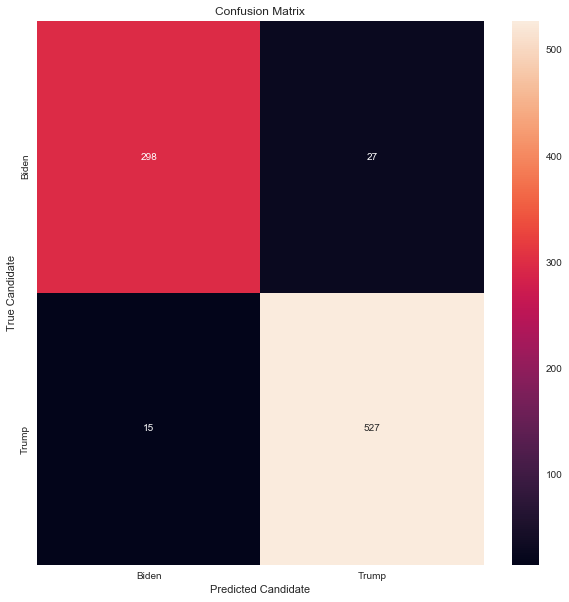

In [126]:
y_pred = eclf.predict(X_test)
print_classification_results(y_pred, y_test, "Voting Classifier")

Able to slighly improve accuracy from ~93% to ~95% by using the top 3 individual classifiers together in a voting ensemble. 

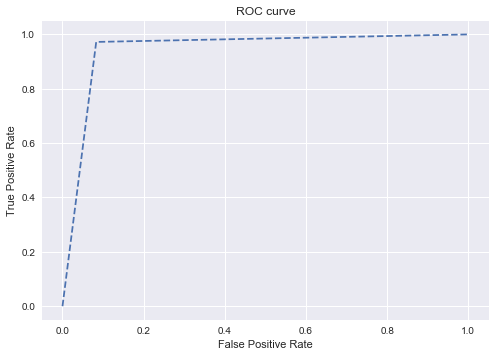

In [127]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr,tpr,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show() 